In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [2]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
targets

In [27]:
X_train,X_test,y_train,y_test=train_test_split(features,targets, test_size=0.3 , random_state = 0)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,targets, test_size=0.3 , random_state = 0)

In [29]:
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [30]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 40 127  69 110  91  47  62  33   7  70 178 162 168 107  90 122 132  25
 150  21  65 139  92  11  63  83 152  91  44  15  81 112  81 129 132 128
 200  39  19 158 148  54 192 132 105  85 106 196 114  88 191 173  34 126
 100 127  98 121 138 133  10  80  80   9  36 137  34 174  55 102  63  50
  95 102  25  73 120  79  25 101 116 151  98 121  60 105 183  74 104 115
  88  62 184 124 181  51 164  32  67  30  18 189  72  28 132  98  52 175
 134 131 100 118  75  14  96 141  63  32 148  43  77 147  28  76  16  30
 109  87  70 114  92 132  26 175 120 200 149 154 105  50 117 154  39 113
 200  94   1 175 165  85  89  66 115  90 116   2  59 197 200 114 122  99
 102  49  48 115 122  80  20  66 160 172  94  84 109   0 128  80  46  70
  79 140  93 186  18 171 154  99 195  87  94 136  12 103 163 102  72 187
  66 143 144 179  75  45 110 156  86  77 117 138  97  83  86  22   3  38
  61 141 107  15  78 163  41 130  24 123 124 200  53 193 138 180 103 153
 200 194  92  82 145  77 108  95 145  40 167  34   

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rndf = RandomForestClassifier(n_estimators=150)

In [33]:
rndf.fit(x_train, training_scores_encoded)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
importance = pd.DataFrame.from_dict({'cols':X_train, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
importance

,cols,importance
12,"(L, S, T, A, T)",0.128593
5,"(R, M)",0.128177
0,"(C, R, I, M)",0.121290
6,"(A, G, E)",0.114308
7,"(D, I, S)",0.109823
11,"(B,)",0.105401
4,"(N, O, X)",0.071754
10,"(P, T, R, A, T, I, O)",0.051516
9,"(T, A, X)",0.051439
2,"(I, N, D, U, S)",0.049683


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

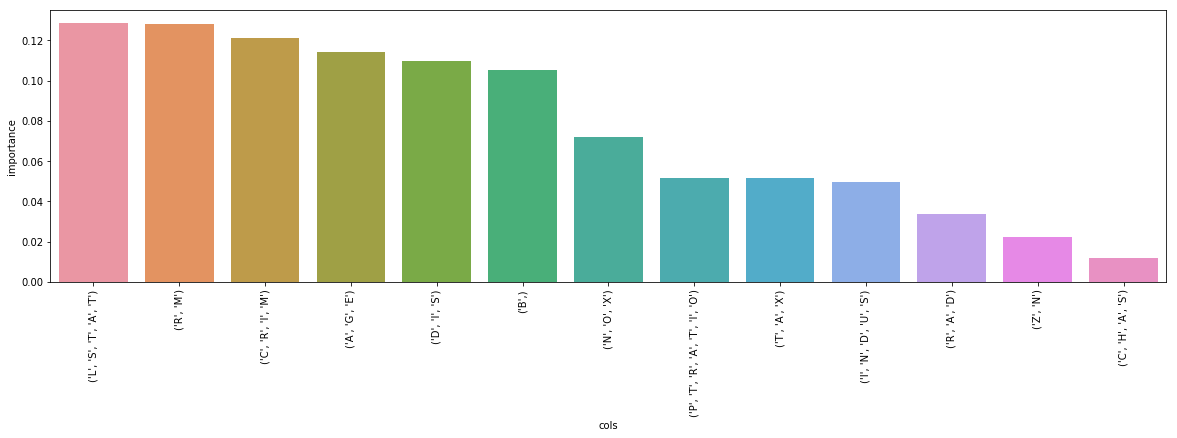

In [47]:
plt.figure(figsize=(20,5))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [38]:
imp_cols = importance[importance.importance >= 0.01].cols.values
imp_cols

array([('L', 'S', 'T', 'A', 'T'), ('R', 'M'), ('C', 'R', 'I', 'M'),
       ('A', 'G', 'E'), ('D', 'I', 'S'), ('B',), ('N', 'O', 'X'),
       ('P', 'T', 'R', 'A', 'T', 'I', 'O'), ('T', 'A', 'X'),
       ('I', 'N', 'D', 'U', 'S'), ('R', 'A', 'D'), ('Z', 'N'),
       ('C', 'H', 'A', 'S')], dtype=object)

In [45]:
y_pred=rndf.predict(x_test)
print("RandomForestClassifier")
print(rndf.predict(x_test))

RandomForestClassifier
[ 79 200 100  17  94  90  98  76  88  79   0  55  60   0 200 110  82 173
 129  75 115 121  87 163  98  55  63 100 200  74  37  81  64 107 129  85
  11 200  53  77 102  57  79  77 105 105 102 100  42 137  28  63  70 200
  69  75  80  63  31 109 124  54 120 197  77 184  66  75  37 130  94  94
 175 122 132   8 189 132 105  59 120  68 200 186 186 132 145  18 126  53
  63  19  95 110 105 128  34 124  39  52 132  87 141 118 107  75   8  94
 105 120 200   6  75  71  75 109  19  82  17 200 184  16  40  59  54  91
 144  64 107 169  66  19   2 121  19 175 149  50 127   7  11 103 181 118
  89  70 175 171  15   0 121 171]
